# Model Optimization 3

I have 
* undone deleted column
* kept more values in Classification binning 
* kept 3 layers
* more neurons
* back to 100 epochs
* at split, stratify=y

## Preprocessing

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

In [3]:
#  Import and read the charity_data.csv.
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head(1)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1


In [4]:
#looking for nulls
application_df.isnull().sum()

EIN                       0
NAME                      0
APPLICATION_TYPE          0
AFFILIATION               0
CLASSIFICATION            0
USE_CASE                  0
ORGANIZATION              0
STATUS                    0
INCOME_AMT                0
SPECIAL_CONSIDERATIONS    0
ASK_AMT                   0
IS_SUCCESSFUL             0
dtype: int64

In [5]:
# Determine the number of unique values in each column.
application_df.nunique()

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [6]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
## I drop ' ASK_AMT ' as well, too many different values

application_df.drop(columns=["EIN","NAME"], inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [7]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count = application_df["APPLICATION_TYPE"].value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_type_count.loc[app_type_count<500].index)
application_types_to_replace

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [9]:
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
classif_count = application_df["CLASSIFICATION"].value_counts()

In [11]:
# You may find it helpful to look at CLASSIFICATION value counts >1
(classif_count > 1).sum()

45

In [12]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classif_count.loc[classif_count<100].index)

In [13]:
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [14]:
# Convert categorical data to numeric with `pd.get_dummies`
app_to_numeric = pd.get_dummies(application_df)
app_to_numeric.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [15]:
app_to_numeric.describe()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
count,34299.000000,3.429900e+04,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,...,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000,34299.000000
mean,0.999854,2.769199e+06,0.532406,0.008047,0.015394,0.031050,0.788274,0.044958,0.034199,0.035453,...,0.021225,0.015831,0.098370,0.006997,0.027843,0.109245,0.004053,0.005394,0.999213,0.000787
std,0.012073,8.713045e+07,0.498956,0.089344,0.123116,0.173457,0.408538,0.207214,0.181743,0.184924,...,0.144136,0.124825,0.297819,0.083358,0.164526,0.311951,0.063532,0.073245,0.028046,0.028046
min,0.000000,5.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.000000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,5.000000e+03,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,7.742000e+03,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,8.597806e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
app_to_numeric["IS_SUCCESSFUL"].value_counts()

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

In [17]:
# Split our preprocessed data into our features and target arrays
X = app_to_numeric.drop(columns="IS_SUCCESSFUL").values
y = app_to_numeric["IS_SUCCESSFUL"].values

In [18]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=31,stratify=y)

In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
# shape
X_test_scaled.shape

(8575, 49)

In [21]:
X_train_scaled.shape

(25724, 49)

## Compile, Train and Evaluate the Model

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input4 = X_train_scaled.shape[1]
node1 = 300
node2 = 100
node3 = 100

In [23]:

nn4 = tf.keras.models.Sequential()

# First hidden layer
nn4.add(tf.keras.layers.Dense(units=node1, activation='relu', input_dim=input4))

# Second hidden layer
nn4.add(tf.keras.layers.Dense(units=node2, activation='relu'))

# Third hidden layer
nn4.add(tf.keras.layers.Dense(units=node3, activation='relu'))

# Output layer
nn4.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               15000     
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 55,301
Trainable params: 55,301
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the model
nn4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
# Train the model
fit_model_4 = nn4.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 5s 5ms/step - loss: 0.5652 - accuracy: 0.7248
Epoch 2/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5544 - accuracy: 0.7294
Epoch 3/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5498 - accuracy: 0.7318
Epoch 4/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5478 - accuracy: 0.7326
Epoch 5/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5471 - accuracy: 0.7336
Epoch 6/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5464 - accuracy: 0.7339
Epoch 7/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5445 - accuracy: 0.7367
Epoch 8/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5447 - accuracy: 0.7358
Epoch 9/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5429 - accuracy: 0.7356
Epoch 10/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5427 - accura

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5841 - accuracy: 0.7259 - 1s/epoch - 5ms/step
Loss: 0.5841495394706726, Accuracy: 0.7259474992752075


In [27]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model_4.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

<AxesSubplot:>

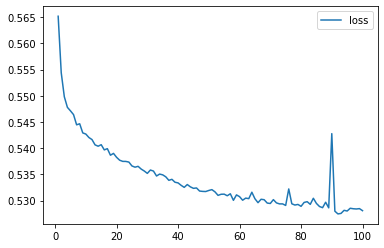

In [28]:
# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

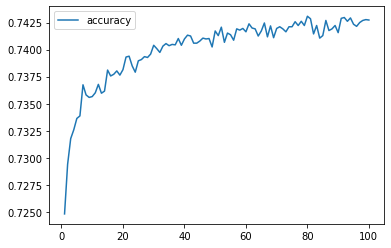

In [29]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [30]:
# Export our model to HDF5 file
nn4.save("Exports/Result_Model4.h5")

### Result for model 4:
#### Loss: 0.58, Accuracy: 0.73
#### Very similar result than model 1, 2 and 3